<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_10_ML_Predi%C3%A7%C3%A3o_de_Desist%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='blue' style='font-size: 30px;'>Como evitar desistências?</font>

No mundo dos negócios, um cliente decidir por não continuar contigo é sempre uma má notícia. Pior ainda, quando vários desistem de continuar, é necessário entender os motivos e, principalmente, tomar ações para evitar mais evasão.

O intuito deste trabalho é avaliar um dataset disponível na famosa plataforma Kaggle, no qual é possível relacionar preciosas informações e compreender com excelente precisão, por que pessoas desistem de continuar como clientes da empresa de crédito.

Mais importante que compreender o que se passou, contudo, é poder criar modelos de Machine Learning, capazes de prever futuros comportamentos do tipo: o cliente vai desistir ou não?

Esta metodologia pode ser aplicada para muitas outras situações: cursos de idiomas, faculdades, instituições financeiras, lojas de varejo, etc e etc.

Vem comigo nessa?


<hr style='border: 4px solid blue'>

##<font color='blue' style='font-size: 30px;'>Metodologia utilizada</font>

Como qualquer projeto de Machine Learning, há um famoso passo a passo padrão a ser desenvolvido, que visa a tornar didática a construção dos modelos preditores.

Para esse projeto, seguirei as seguintes etapas de atuação, conforme sugestão da dra. Juliana Scudilio (* citada no item 2):


1.   Entendimento do problema
2.   Obtenção dos dados e referência técnica
3.   Análise exploratória e visualização dos dados
4.   Pré-processamento
5.   Modelos de Machine Learning
6.   Avaliação dos modelos
7.   Conclusão

<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>1. Entendimento do problema</font>

Como já introduzido acima, a base de dados (dataset) utilizada para este projeto é pública e real.

Conforme as palavras do responsável em publicar as informações do dataset: "*Com base em dados de clientes de um banco, calculamos se um deles tem chance de permanecer na empresa ou não*."

Ou seja, com base em modelos computacionais estatísticos, o projeto quer calcular com a melhor eficácia possível, a possibilidade de um cliente rescindir ou não com a instituição financeira em questão.

<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>2.   Obtenção dos dados e referência técnica</font>

*   Fonte do dataset: KAGGLE, "*Churn Modelling*"
*   Fonte de referências de entendimento de modelos de ML: Flai, "Partes I, II e III: Como aplicar Machine Learning para reduzir o Churn", escritos pela dra. Juliana Scudilio.

*   Fonte do dataset: https://www.kaggle.com/shubh0799/churn-modelling
*   Fonte de referências de entendimento de modelos de ML: https://www.flai.com.br/juscudilio/parte-i-como-aplicar-machine-learning-para-reduzir-o-churn/

####<font>importando bibliotecas básicas em Python</font>

In [ ]:
#Bibliotecas básicas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Abrir base de dados, que está no Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/Churn_Modelling.csv')

<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>3.   Análise exploratória e visualização dos dados</font>

In [ ]:
#Primeira observação da base de dados, em Inglês

dados.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Renomeando as colunas para o Português

dados2 = dados.copy()
a_renomear = {
    'RowNumber' : 'Item',
    'CustomerId' : 'Id_Cliente',
    'Surname' : 'Sobrenome',
    'CreditScore' : 'Pontuacao_Credito',
    'Geography' : 'Pais',
    'Gender' : 'Genero',
    'Age' : 'Idade',
    'Tenure' : 'Estabilidade_Emprego',
    'Balance' : 'Saldo_CC',
    'NumOfProducts' : 'Numero_Produtos',
    'HasCrCard' : 'Tem_CartaoCred',
    'IsActiveMember' : 'Membro_Ativo',
    'EstimatedSalary' : 'Salario',
    'Exited' : 'Desistiu'
}
dados2 = dados2.rename(columns = a_renomear)
dados2

,Item,Id_Cliente,Sobrenome,Pontuacao_Credito,Pais,Genero,Idade,Estabilidade_Emprego,Saldo_CC,Numero_Produtos,Tem_CartaoCred,Membro_Ativo,Salario,Desistiu
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Entendimento das variáveis disponíveis, por cliente:



*   **Item**: numeração de linhas do dataset
*   **Id_Cliente**: identificação única
*   **Sobrenome**: identificação pessoal
*   **Pontuacao_Credito**: avaliação da 'qualidade'
*   **Pais**: país de residência
*   **Genero**: masculino ou feminino
*   **Idade**: idade
*   **Estabilidade_Emprego**: ranking de estabilidade empregatícia
*   **Saldo_CC**: saldo em conta
*   **Numero_Produtos**: quantidade de produtos adquiridos
*   **Tem_CartaoCred**: se possui ou não cartão de crédito
*   **Membro_Ativo**: se está ativo ou não com sua conta
*   **Salario**: salário
*   **Desistiu**: informação mais importante da base de dados, e que servirá como referência de todo projeto, informa se o cliente desistiu ou não de permanecer com a instituição financeira.

<hr style='border: 4px solid blue'>

In [ ]:
#Checando os dados únicos de cada variável

dados2.nunique()

Item                    10000
Id_Cliente              10000
Sobrenome                2932
Pontuacao_Credito         460
Pais                        3
Genero                      2
Idade                      70
Estabilidade_Emprego       11
Saldo_CC                 6382
Numero_Produtos             4
Tem_CartaoCred              2
Membro_Ativo                2
Salario                  9999
Desistiu                    2
dtype: int64

Avaliação importante para entender se as variáveis são discretas ou contínuas, e quantas respostas **únicas** estão disponíveis por variável.

In [ ]:
#Checando se há dados nulos, que podem atrapalhar os cálculos dos modelos à frente

dados2.isnull().sum()

Item                    0
Id_Cliente              0
Sobrenome               0
Pontuacao_Credito       0
Pais                    0
Genero                  0
Idade                   0
Estabilidade_Emprego    0
Saldo_CC                0
Numero_Produtos         0
Tem_CartaoCred          0
Membro_Ativo            0
Salario                 0
Desistiu                0
dtype: int64

In [ ]:
#Conhecendo as variáveis e seus tipos de dados: numéricas ou categóricas?

dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item                  10000 non-null  int64  
 1   Id_Cliente            10000 non-null  int64  
 2   Sobrenome             10000 non-null  object 
 3   Pontuacao_Credito     10000 non-null  int64  
 4   Pais                  10000 non-null  object 
 5   Genero                10000 non-null  object 
 6   Idade                 10000 non-null  int64  
 7   Estabilidade_Emprego  10000 non-null  int64  
 8   Saldo_CC              10000 non-null  float64
 9   Numero_Produtos       10000 non-null  int64  
 10  Tem_CartaoCred        10000 non-null  int64  
 11  Membro_Ativo          10000 non-null  int64  
 12  Salario               10000 non-null  float64
 13  Desistiu              10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Retirando variáveis que não agregam valor ao entendimento do caso

dados3 = dados2.copy()
dados3.drop(['Item', 'Id_Cliente','Sobrenome'], axis=1, inplace=True)

In [ ]:
#Análise exploratória dos dados numéricos

dados3.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Pontuacao_Credito,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Idade,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Estabilidade_Emprego,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Saldo_CC,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
Numero_Produtos,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
Tem_CartaoCred,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Membro_Ativo,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Salario,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0
Desistiu,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Análise mais importante até aqui. Primeiro, é importante avaliar se há outliers ou valores nitidamente equivocados, como idade de 0 ou 150 anos, por exemplo.
Além disso, os valores de mínimo, máximo, médio e mediana ajudam a traçar alguns perfis interessantes, como faço a seguir:



*   **Pontuacao_Credito**: escala fica conhecida, e sabemos que média e mediana estão próximas, sem muita variabilidade;
*   **Idade**: de 18 a 92 anos, com predominância de pessoas ao redor dos 37-40 anos;
*   **Estabilidade_Emprego**: escala fica conhecida, e sabemos que média e mediana são iguais, sem muita variabilidade;
*   **Saldo_CC**: de 0 a 250 mil, com média em 75 mil: públicos bastante distintos. 3° quartil indica que tem bastante gente com bastante dinheiro parado na cartela de clientes!
*   **Numero_Produtos**: a maioria dos clientes possui poucos produtos. Isso se mostrará relevante mais à frente;
*   **Tem_CartaoCred**: a maioria possui.
*   **Membro_Ativo**: parece um indicador bem balanceado;
*   **Salario**: como já visto, mostra realidades financeiras demasiado diferentes entre os clientes, o que pode exigir estratégias bem diferentes nas tratativas futuras;
*   **Desistiu**: por aqui, sabemos apenas que o nível de desistência é inferior a 25%, só isso.

<hr style='border: 4px solid blue'>

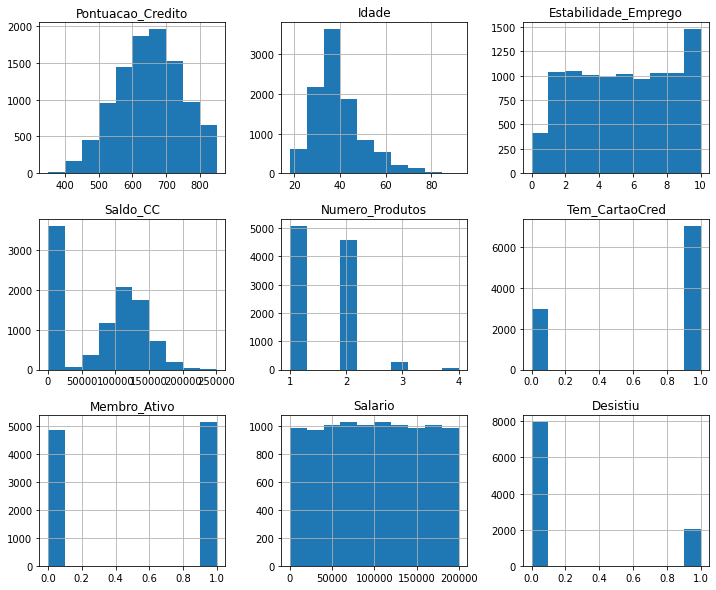

In [ ]:
#Conhecendo a distribuição das variáveis numéricas por meio de histogramas

dados3.hist(figsize=(12,10));

Os histogramas auxiliam e muito o entendimento da distribuição dos dados por variável:



*   **Pontuacao_Credito**: distribuição normal;
*   **Idade**: assimetria positiva esperada;
*   **Estabilidade_Emprego**: indica estabilidade, com reforço interessante de notas máximas;
*   **Saldo_CC**: distribuição normal, com um número exorbitante de saldos zerados ou muito baixos, indicando talvez que essa não seja a conta principal de muitos clientes ou ainda de pessoas quase sem recursos financeiros;
*   **Numero_Produtos**: definitivamente, a esmagadora maioria possui poucos produtos, o que não é bom indicador;
*   **Tem_CartaoCred**: a maioria possui cartão;
*   **Membro_Ativo**: muito estável a distribuição;
*   **Salario**: incrivelmente equilibrado;
*   **Desistiu**: conhecemos finalmente a taxa de desistência, em torno de 20%: excessivamente elevada!

<hr style='border: 4px solid blue'>

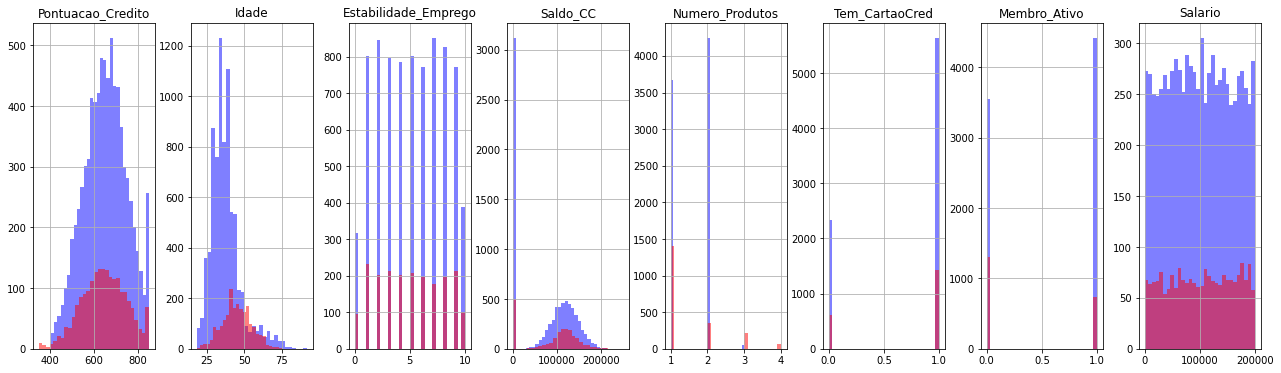

In [ ]:
#Observando as distribuições de cada variável numérica independente em relação à variável dependente

dados4 = dados3.copy()
dados4['Desistiu_cat'] = dados4['Desistiu'].replace([0,1],['Não','Sim'])
x_cont = ['Pontuacao_Credito','Idade','Estabilidade_Emprego',
          'Saldo_CC','Numero_Produtos', 'Tem_CartaoCred',
          'Membro_Ativo','Salario'
         ]
fig, ax = plt.subplots(1, 8, figsize=(22, 6));
dados4[dados4.Desistiu_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
dados4[dados4.Desistiu_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

Os dados vão se transformando em informações cada vez mais úteis e precisas. Dessa vez, a intenção foi pintar de rosa os clientes que desistiram e, com isso, aprofundar o entendimento da análise.

Mas é bom lembrar que ainda não há rigor científico das análises, e sim percepções visuais que precisam ser confirmadas posteriormente:



*   **Pontuacao_Credito**: a desistência desenha a mesma curva já vista;
*   **Idade**: aqui, percebe-se um certo deslocamento à direita do público que desiste, jogando para a faixa dos 40 anos o público principal;
*   **Estabilidade_Emprego**: praticamente copia a distribuição dos dados originais;
*   **Saldo_CC**: praticamente copia a distribuição dos dados originais;
*   **Numero_Produtos**: indica predominância de desisitência que quem possui apenas 1 produto;
*   **Tem_CartaoCred**: praticamente copia a distribuição dos dados originais;
*   **Membro_Ativo**: análise bastante interessante, que mostra claramente que os inativos são os que mais vão embora;
*   **Salario**: praticamente copia a distribuição dos dados originais.
<hr style='border: 4px solid blue'>

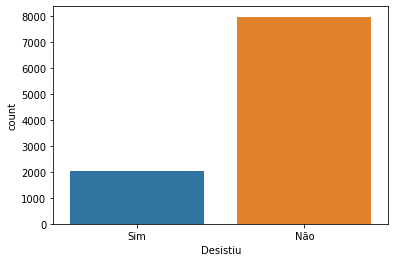

In [ ]:
#Quantos clientes desistiram?

dados4['Desistiu'] = dados4['Desistiu'].replace([0,1],['Não','Sim'])
sns.countplot(data=dados4,x='Desistiu')


In [ ]:
#Analisando as variáveis categóricas - parte I
#Cálculo número de mulheres e sua taxa

selecao = dados2['Genero'] == 'Female'
n1 = dados[selecao].shape[0]
n1 #número total de mulheres

selecao = (dados2['Genero'] == 'Female') & (dados2['Desistiu'] == 1)
n2 = dados[selecao].shape[0]
n2 #número de mulheres que desistiram

n3 = n1 - n2 #número de mulheres que não desistiram
taxa_feminina = n2 / n1 * 100

#Cálculo número de homens e sua taxa

selecao = dados2['Genero'] == 'Male'
n4 = dados[selecao].shape[0]
n4 #número total de homens

selecao = (dados2['Genero'] == 'Male') & (dados2['Desistiu'] == 1)
n5 = dados[selecao].shape[0]
n5 #número de homens que desistiram

n6 = n4 - n5 #número de homens que não desistiram
taxa_masculina = n5 / n4 * 100

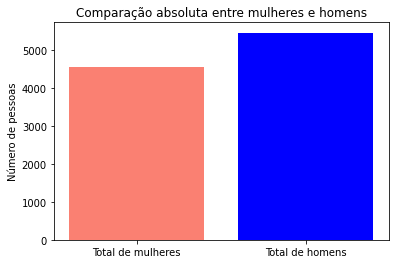

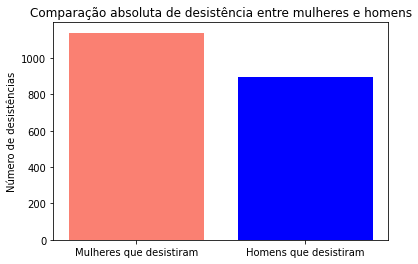

In [ ]:
#Criação do gráfico absoluto

titulos = ['Total de mulheres','Total de homens']
taxas = [n1,n4]
plt.bar(titulos,taxas,color=('salmon','blue'))
plt.ylabel('Número de pessoas')
plt.title('Comparação absoluta entre mulheres e homens')
plt.show()

titulos = ['Mulheres que desistiram','Homens que desistiram']
taxas = [n2,n5]
plt.bar(titulos,taxas,color=('salmon','blue'))
plt.ylabel('Número de desistências')
plt.title('Comparação absoluta de desistência entre mulheres e homens')
plt.show()

Números absolutos são enganosos, sendo que o ideal é relativizá-los, criando taxas.

Por exemplo, qual a proporção de mulheres que desistem? Qual a de homens?

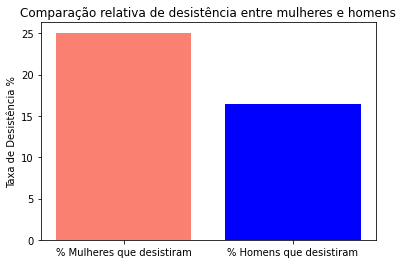

In [ ]:
#Criação do gráfico relativo

titulos = ['% Mulheres que desistiram','% Homens que desistiram']
taxas = [taxa_feminina,taxa_masculina]
plt.bar(titulos,taxas,color=('salmon','blue'))
plt.ylabel('Taxa de Desistência %')
plt.title('Comparação relativa de desistência entre mulheres e homens')
plt.show()

Dessa forma, fica muito claro que o % de mulheres que desistem de ser clientes é bem maior (>60%) que o % de homens. Essa informação é bastante valiosa, e deve ser considerada.
Mais à frente, porém, veremos que há variáveis mais influentes que essa, quando o assunto é 'desistência'.
<hr style='border: 4px solid blue'>

In [ ]:
#Analisando as variáveis categóricas - parte II
##Cálculo número de cidadãos franceses e sua taxa

selecao = dados2['Pais'] == 'France'
n1 = dados[selecao].shape[0]
n1 #número total de franceses

selecao = (dados2['Pais'] == 'France') & (dados2['Desistiu'] == 1)
n2 = dados[selecao].shape[0]
n2 #número de franceses que desistiram

n3 = n1 - n2 #número de franceses que não desistiram
taxa_francesa = n2 / n1 * 100

##Cálculo número de cidadãos espanhóis e sua taxa

selecao = dados2['Pais'] == 'Spain'
n4 = dados[selecao].shape[0]
n4 #número total de espanhóis

selecao = (dados2['Pais'] == 'Spain') & (dados2['Desistiu'] == 1)
n5 = dados[selecao].shape[0]
n5 #número de espanhóis que desistiram

n6 = n4 - n5 #número de espanhóis que não desistiram
taxa_espanhola = n5 / n4 * 100

##Cálculo número de cidadãos alemães e sua taxa

selecao = dados2['Pais'] == 'Germany'
n7 = dados[selecao].shape[0]
n7 #número total de alemães

selecao = (dados2['Pais'] == 'Germany') & (dados2['Desistiu'] == 1)
n8 = dados[selecao].shape[0]
n8 #número de alemães que desistiram

n9 = n7 - n8 #número de alemães que não desistiram
taxa_alema = n8 / n7 * 100

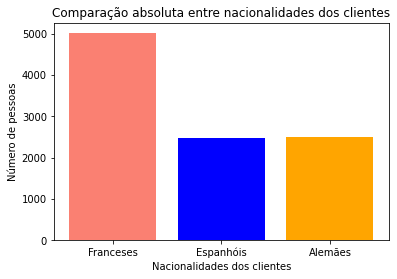

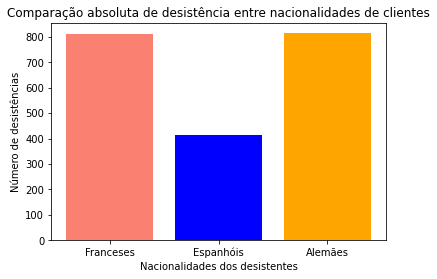

In [ ]:
#Criação do gráfico absoluto

titulos = ['Franceses','Espanhóis','Alemães']
taxas = [n1,n4,n7]
plt.bar(titulos,taxas,color=('salmon','blue','orange'))
plt.ylabel('Número de pessoas')
plt.xlabel('Nacionalidades dos clientes')
plt.title('Comparação absoluta entre nacionalidades dos clientes')
plt.show()

titulos = ['Franceses','Espanhóis','Alemães']
taxas = [n2,n5,n8]
plt.bar(titulos,taxas,color=('salmon','blue','orange'))
plt.ylabel('Número de desistências')
plt.xlabel('Nacionalidades dos desistentes')
plt.title('Comparação absoluta de desistência entre nacionalidades de clientes')
plt.show()

Números absolutos são enganosos, sendo que o ideal é relativizá-los, criando taxas, da mesma forma como feito com o gênero.

Por exemplo, qual a proporção de franceses que desistem? Qual a de espanhóis? E quanto aos alemães?

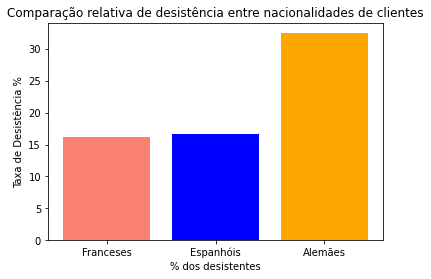

In [ ]:
#Criação do gráfico relativo

titulos = ['Franceses','Espanhóis','Alemães']
taxas = [taxa_francesa,taxa_espanhola,taxa_alema]
plt.bar(titulos,taxas,color=('salmon','blue','orange'))
plt.ylabel('Taxa de Desistência %')
plt.xlabel('% dos desistentes')
plt.title('Comparação relativa de desistência entre nacionalidades de clientes')
plt.show()

Essa comparação é ainda mais dramática que a relativa ao gênero, uma vez que o público de clientes é em maior parte francês, mas aquele que desiste da instituição financeira é predominantemente alemão. Faz-se urgente e necessário compreender esse fato!
<hr style='border: 4px solid blue'>

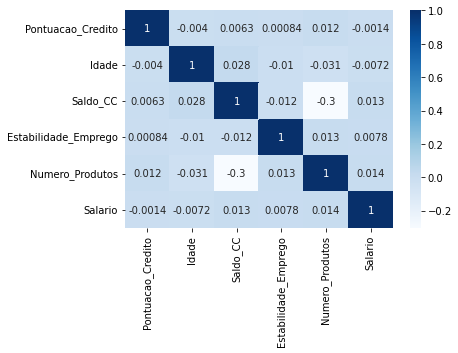

In [ ]:
#Cálculo de correlação entre variáveis numéricas

dados3_cont = dados3[['Pontuacao_Credito','Idade','Saldo_CC','Estabilidade_Emprego','Numero_Produtos','Salario']]
sns.heatmap(dados3_cont.corr(),annot = True, cmap='Blues')

Essa avaliação de correlação entre variáveis tem o objetivo de reduzir a dimensionalidade do dataset, com intuito de simplificar os cálculos dos modelos de ML, e melhorar seus resultados.
<hr style='border: 4px solid blue'>

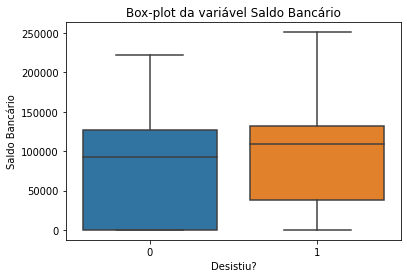

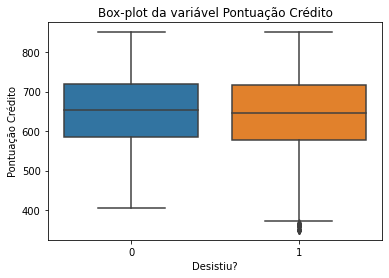

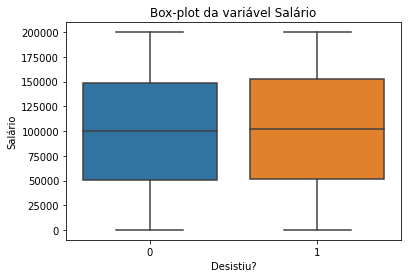

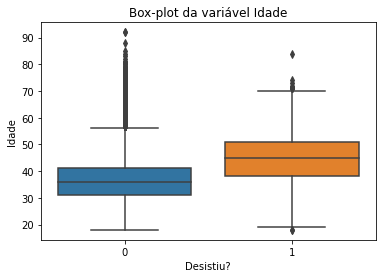

In [ ]:
#Gráficos para as variáves quantitativas contínuas

sns.boxplot(x="Desistiu", y="Saldo_CC", data=dados2);
plt.title('Box-plot da variável Saldo Bancário');
plt.xlabel('Desistiu?');
plt.ylabel('Saldo Bancário');
dados2.groupby(['Desistiu'])['Saldo_CC'].mean()
plt.show()

sns.boxplot(x="Desistiu", y="Pontuacao_Credito", data=dados2);
plt.title('Box-plot da variável Pontuação Crédito');
plt.xlabel('Desistiu?');
plt.ylabel('Pontuação Crédito');
dados2.groupby(['Desistiu'])['Pontuacao_Credito'].mean()
plt.show()

sns.boxplot(x="Desistiu", y="Salario", data=dados2);
plt.title('Box-plot da variável Salário');
plt.xlabel('Desistiu?');
plt.ylabel('Salário');
dados2.groupby(['Desistiu'])['Salario'].mean()
plt.show()

sns.boxplot(x="Desistiu", y="Idade", data=dados2);
plt.title('Box-plot da variável Idade');
plt.xlabel('Desistiu?');
plt.ylabel('Idade');
dados2.groupby(['Desistiu'])['Idade'].mean()
plt.show()

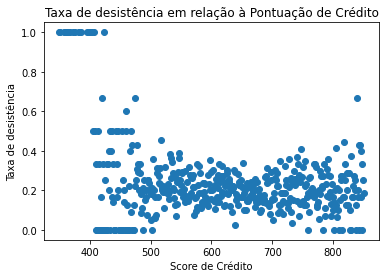

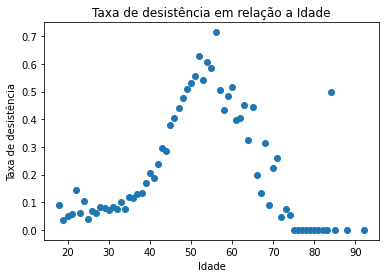

In [ ]:
#Gráficos de dispersão para clarificar variáveis contínuas

#Pontuação crédito
df_plot = dados2.groupby ('Pontuacao_Credito'). Desistiu.mean (). reset_index () 
x = df_plot['Pontuacao_Credito']
y = df_plot['Desistiu']

plt.scatter(x,y)
plt.title('Taxa de desistência em relação à Pontuação de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de desistência')
plt.show()

#Idade
df_plot = dados2.groupby ('Idade'). Desistiu.mean (). reset_index () 
x = df_plot['Idade']
y = df_plot['Desistiu']

plt.scatter(x,y)
plt.title('Taxa de desistência em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de desistência')
plt.show()

As análises em variáveis contínuas são feitas por meio de outras ferramentas, como boxplot e diagramas de dispersão. Cada um com suas vantagens e desvantagens de análises.

As comparações também são entre os clientes que ficaram e os que desistiram da instituição:

*   **Saldo_CC**: os dois boxplot revelam que não há muita diferença entre eles, que justifique os motivos de porquê desistiram ou não;
*   **Pontuacao_Credito**: o boxplot não auxilia a análise, uma vez que os dois gráficos são praticamente idênticos, contudo o gráfico de dispersão revela algo inédito: quase todas desistências referem-se aos clientes de score mais baixo!;
*   **Salario**: os dois boxes do boxplot são quase que idênticos;
*   **Idade**: os 2 boxplot da idade realmente agregam valor ao entendimento dos perfis de clientes que desistem. A faixa de idade mediana de quem fica na instituição é a dos 30, enquanto que a faixa dos que desistem é a dos 40.

<hr style='border: 4px solid blue'>

In [ ]:
#Necessário retirar do dataset essa variável nova criada há pouco

dados4.drop(['Desistiu_cat'], axis=1, inplace=True)

###<font color='blue' style='font-size: 30px;'>4.   Pré-Processamento dos dados</font>

In [ ]:
#Separando as variáveis dependentes e independentes

y = dados4['Desistiu']

x = dados4
x = dados4.drop('Desistiu',axis = 1)

In [ ]:
#Variáveis Contínuas

x_cont = ['Pontuacao_Credito','Saldo_CC','Idade','Salario','Estabilidade_Emprego']

#Separando as variáveis categóricas para criar os dummies

x_cat = list(set(x) - set(x_cont))
x_dummies = x[x_cat]
x_dummies

,Numero_Produtos,Membro_Ativo,Genero,Tem_CartaoCred,Pais
0,1,1,Female,1,France
1,1,1,Female,0,Spain
2,3,0,Female,1,France
3,2,0,Female,0,France
4,1,1,Female,1,Spain
...,...,...,...,...,...
9995,2,0,Male,1,France
9996,1,1,Male,1,France
9997,1,1,Female,0,France
9998,2,0,Male,1,Germany


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Processamento das variáveis categóricas

#Variável gênero é binária: mulher se torna 0, homem se torna 1.

le = LabelEncoder()
x['Genero'] = le.fit_transform(x['Genero']) 
x.head(6)

,Pontuacao_Credito,Pais,Genero,Idade,Estabilidade_Emprego,Saldo_CC,Numero_Produtos,Tem_CartaoCred,Membro_Ativo,Salario
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71


In [ ]:
#Criando Dummies para as variáveis Pais e Numero_Produtos

x_final = pd.get_dummies (data = x, columns = ['Pais','Numero_Produtos'] )
x_final

,Pontuacao_Credito,Genero,Idade,Estabilidade_Emprego,Saldo_CC,Tem_CartaoCred,Membro_Ativo,Salario,Pais_France,Pais_Germany,Pais_Spain,Numero_Produtos_1,Numero_Produtos_2,Numero_Produtos_3,Numero_Produtos_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Ajeitando as escalas das variáveis numéricas

scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,Pontuacao_Credito,Saldo_CC,Idade,Salario,Estabilidade_Emprego
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


In [ ]:
x_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Pontuacao_Credito,10000.0,0.601058,0.193307,0.0,0.468000,0.604000,0.736000,1.0
Genero,10000.0,0.545700,0.497932,0.0,0.000000,1.000000,1.000000,1.0
Idade,10000.0,0.282727,0.141727,0.0,0.189189,0.256757,0.351351,1.0
Estabilidade_Emprego,10000.0,0.501280,0.289217,0.0,0.300000,0.500000,0.700000,1.0
Saldo_CC,10000.0,0.304848,0.248696,0.0,0.000000,0.387402,0.508749,1.0
Tem_CartaoCred,10000.0,0.705500,0.455840,0.0,0.000000,1.000000,1.000000,1.0
Membro_Ativo,10000.0,0.515100,0.499797,0.0,0.000000,1.000000,1.000000,1.0
Salario,10000.0,0.500441,0.287580,0.0,0.254977,0.500960,0.746955,1.0
Pais_France,10000.0,0.501400,0.500023,0.0,0.000000,1.000000,1.000000,1.0
Pais_Germany,10000.0,0.250900,0.433553,0.0,0.000000,0.000000,1.000000,1.0


Parametrizar o dataset entre valores zero e um é muito importante para melhorar a performance dos modelos de Machine Learning.
<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>5.   Modelos de Machine Learning</font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Dividindo os dados entre treino e teste

SEED = 51
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x_final, y, test_size = 0.3, stratify = y)
print("Treino com %d elementos e teste com %d elementos" % (len(treino_x), len(teste_x)))

Treino com 7000 elementos e teste com 3000 elementos


In [ ]:
#Dummy classifier

from sklearn.dummy import DummyClassifier

#Primeira tentativa: 'stratified'

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 79.63%


In [ ]:
#Segunda tentativa: 'mostfrequent'

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 79.63%


Os valores 'dummy' servem como parâmetro de comparações, para saber se os resultados dos modelos de Machine Learning calculados estão 'bons' ou não.

Funciona como uma nota mínima a ser superada: valores menores são inaceitáveis.
<hr style='border: 4px solid blue'>

In [ ]:
from sklearn.svm import LinearSVC #modelo 01
from sklearn.neighbors import KNeighborsClassifier #modelo 02
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC #modelo 03
from sklearn.tree import DecisionTreeClassifier #modelo 04
from sklearn.naive_bayes import MultinomialNB #modelo 05
from sklearn.ensemble import AdaBoostClassifier #modelo 06
from sklearn.ensemble import RandomForestClassifier #modelo 07
from xgboost import XGBClassifier #modelo 08

from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#Criação de função para rodar modelos de Machine Learning & Matriz de Confusão

def modelo(lista_de_modelos, treino_x, treino_y, teste_x, teste_y):

  for item in lista_de_modelos: 
    model = item

    #Parte do código específica para o modelo StandardScaler
    
    if model == SVC():
      scaler = StandardScaler()
      scaler.fit(treino_x)
      treino_x = scaler.transform(treino_x)
      teste_x = scaler.transform(teste_x)
    
    #Cálculo do modelo propriamente dito

    model.fit(treino_x, treino_y)
    previsoes = model.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes) * 100
    print("%s - A acurácia do modelo foi %.2f%%\n" %(model, acuracia))
    
    #Matriz de confusão

    previsoes = model.predict(teste_x)
    print (pd.crosstab(teste_y, previsoes, rownames = ['Real'], colnames = ['Predito'], margins = True))
    print("-------------")

    #Relatório de classificação
    preditos = model.predict(teste_x)
    print(classification_report(teste_y, preditos))
    print("------------- ------------- -------------")

#####
lista_de_modelos = [LinearSVC(), KNeighborsClassifier(), SVC(), 
                    DecisionTreeClassifier(), MultinomialNB(),
                    AdaBoostClassifier(), RandomForestClassifier(),
                    XGBClassifier()]

In [ ]:
#Cálculos e resultados dos 09 modelos

modelo(lista_de_modelos, treino_x, treino_y, teste_x, teste_y)

LinearSVC() - A acurácia do modelo foi 84.07%

Predito   Não  Sim   All
Real                    
Não      2319   70  2389
Sim       408  203   611
All      2727  273  3000
-------------
              precision    recall  f1-score   support

         Não       0.85      0.97      0.91      2389
         Sim       0.74      0.33      0.46       611

    accuracy                           0.84      3000
   macro avg       0.80      0.65      0.68      3000
weighted avg       0.83      0.84      0.82      3000

------------- ------------- -------------
KNeighborsClassifier() - A acurácia do modelo foi 82.47%

Predito   Não  Sim   All
Real                    
Não      2231  158  2389
Sim       368  243   611
All      2599  401  3000
-------------
              precision    recall  f1-score   support

         Não       0.86      0.93      0.89      2389
         Sim       0.61      0.40      0.48       611

    accuracy                           0.82      3000
   macro avg       0.73      0

###<font color='blue' style='font-size: 30px;'>6.   Avaliação dos modelos de Machine Learning</font>

Compreensão da Matriz de Confusão:

*   TP: verdadeiro positivo
*   TN: verdadeiro negativo
*   FP: falso positivo
*   FN: falso negativo

Compreensão do Relatório de Classificação:

*   Precision (quanto efetivo é o 'sim' do modelo): TP/(TP+FP): 0.80 foi o melhor resultado, via XGBClassifier;
*   Recall (quanto efetivo é o 'sim' do modelo em relação a todos os 'sim' reais): TP/(TP+FN): 0.51 foi o melhor resultado, via  DecisionTreeClassifier
*   F1 (média harmônica entre Precision & Recall): empate técnico entre os 2 mdelos citados acima!
*   Acurácia (quanto o modelo acerta em relação ao todo): 0.87 foi o melhor resultado, via XGBClassifier.


**Modelo escolhido: XGBClassifier**
<hr style='border: 4px solid blue'>

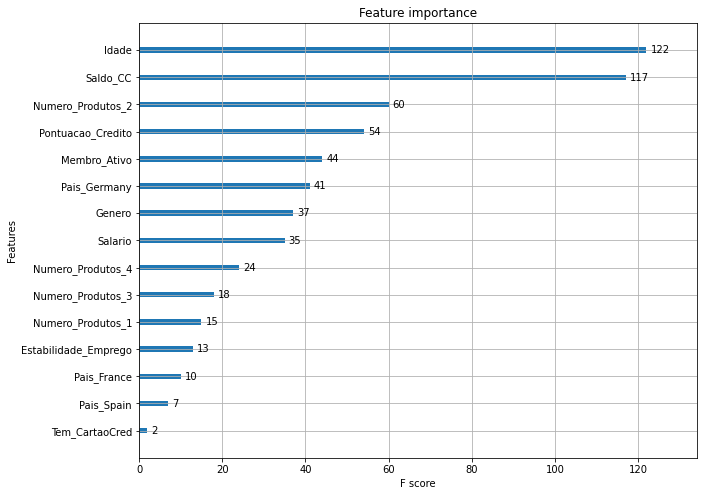

In [ ]:
import matplotlib.pyplot as plt 
from xgboost import plot_importance

#Cálculo do modelo vencedor XGBClassifier()

xgb = XGBClassifier()
xgb.fit(treino_x, treino_y)
previsoes = xgb.predict(teste_x)

#Analisando a importância de cada variável

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

Essa ferramenta realiza algo fantástico: ranqueia as principais variáveis, para que possamos entender quais aquelas que mais influenciam o resultado final.

Mais acima, pelos gráficos, as análises eram percepções. Dessa vez, é o rigor matemático que define quem é quem.

As 5 principais variáveis são:

1.   **Idade**;
2.   **Saldo_CC**;
3.   **Numero_produtos_2**;
4.   **Pontuacao_Credito**;
5.   **Membro_Ativo**.

<hr style='border: 4px solid blue'>

In [ ]:
#Método Ensemble para tentar extrair o melhor entre os 2 melhores modelos

from sklearn.ensemble import VotingClassifier

#Já tenho o 'xgb', calculado logo acima
#Falta apenas o 'dt' do modelo DecisionTreeClassifier()

dt = DecisionTreeClassifier()
dt.fit(treino_x, treino_y)
previsoes = dt.predict(teste_x)

#Utilizando o Voting Classifier

voto = VotingClassifier(estimators=[('dt', dt),('xgb',xgb)], voting='soft')
voto = voto.fit(treino_x, treino_y)
predito_y = voto.predict(teste_x)
print(classification_report(teste_y, predito_y))

              precision    recall  f1-score   support

         Não       0.87      0.85      0.86      2389
         Sim       0.46      0.51      0.48       611

    accuracy                           0.78      3000
   macro avg       0.67      0.68      0.67      3000
weighted avg       0.79      0.78      0.78      3000



A combinação entre os 2 melhores modelos não apresentou performance melhor, sendo assim, continuo optando pelo **XGBClassifier**.
<hr style='border: 4px solid blue'>

###<font color='blue' style='font-size: 30px;'>7.   Conclusão</font>

O projeto se encerra por aqui. 

Os dados foram transformados em informações, seja pelas análises gráficas ou pelos parâmetros estatísticos calculados inicialmente.

Depois disso, foram testados diversos modelos de Machine Learning, onde não apenas a acuracidade foi avaliada, mas também a capacidade dos modelos em prever com eficácia quem desiste de ser cliente e quem não desiste.

É necessário alinhar com o cliente que adquire esse tipo de trabalho, que trata-se de modelos estatísticos, e não de oráculos inerráveis. Mais ainda, o modelo é bom para certas previsões e menos bom para outras, contudo, é uma ferramenta capaz de se antecipar a uma das atitudes mais temidas por quem tem um business: quem desiste e quem não desiste de seguir conosco.

Eu me impressiono com a força da Ciência de Dados!

<hr style='border: 4px solid blue'>